In [1]:
import json

loo_file = "./qa_err_raw_loo.jsonl"
prune_file = "./qa_err_raw_prune.jsonl"
reweight_file = "./qa_err_raw_reweight.jsonl"

with open(loo_file, "r") as f:
    loo_result = [json.loads(line) for line in f.readlines()]
with open(prune_file, "r") as f:
    prune_result = [json.loads(line) for line in f.readlines()]
with open(reweight_file, "r") as f:
    reweight_result = [json.loads(line) for line in f.readlines()]

In [2]:
acc_loo = [i["acc_loo"] for i in loo_result][:70]
acc_prune = [i["acc_prune"] for i in prune_result][:70]
acc_reweight = [i["acc_reweight"] for i in reweight_result][:70]
acc_vanilla = [i["acc_baseline"] for i in prune_result][:70]

In [3]:
save_file = "./raw_result.jsonl"
with open(save_file, "r") as f:
    raw_result = [json.loads(line) for line in f.readlines()]

import pandas as pd
raw_result_df = pd.DataFrame(raw_result)

num_relation = 70
relation = raw_result_df["relation"][:num_relation].tolist()
acc_davincii = raw_result_df["acc_davincii"][:num_relation].tolist()

In [4]:
def change_reltaion(relation):
    d = {"drug_or_therapy_used_for_treatment":"drug_or_therapy", "languages_spoken_written_or_signed":"languages_spoken", "located_in_the_administrative_territorial_entity":"located_in",
    "language_of_work_or_name":"language_of_work","medical_condition_treated":"medical_condition", "original_language_of_film_or_TV_show":"original_language_of_film",
    "recommended_unit_of_measurement":"recommended_unit", "office_held_by_head_of_government":"office_held_by"}

    for id in range(len(relation)):
        if relation[id] in d:
            print(relation[id])
            relation[id] = d[relation[id]]

    return relation

relation = change_reltaion(relation)

print(relation)

drug_or_therapy_used_for_treatment
language_of_work_or_name
languages_spoken_written_or_signed
located_in_the_administrative_territorial_entity
medical_condition_treated
office_held_by_head_of_government
original_language_of_film_or_TV_show
recommended_unit_of_measurement
['applies_to_jurisdiction', 'author', 'award_received', 'basic_form_of_government', 'capital', 'capital_of', 'composer', 'continent', 'country', 'country_of_citizenship', 'country_of_origin', 'creator', 'currency', 'developer', 'director', 'discoverer_or_inventor', 'drug_or_therapy', 'educated_at', 'employer', 'field_of_work', 'genetic_association', 'genre', 'has_part', 'head_of_government', 'head_of_state', 'headquarters_location', 'industry', 'influenced_by', 'instance_of', 'instrument', 'language_of_work', 'languages_spoken', 'located_in', 'location', 'location_of_discovery', 'location_of_formation', 'majority_opinion_by', 'manufacturer', 'measured_physical_quantity', 'medical_condition', 'member_of', 'member_of_po

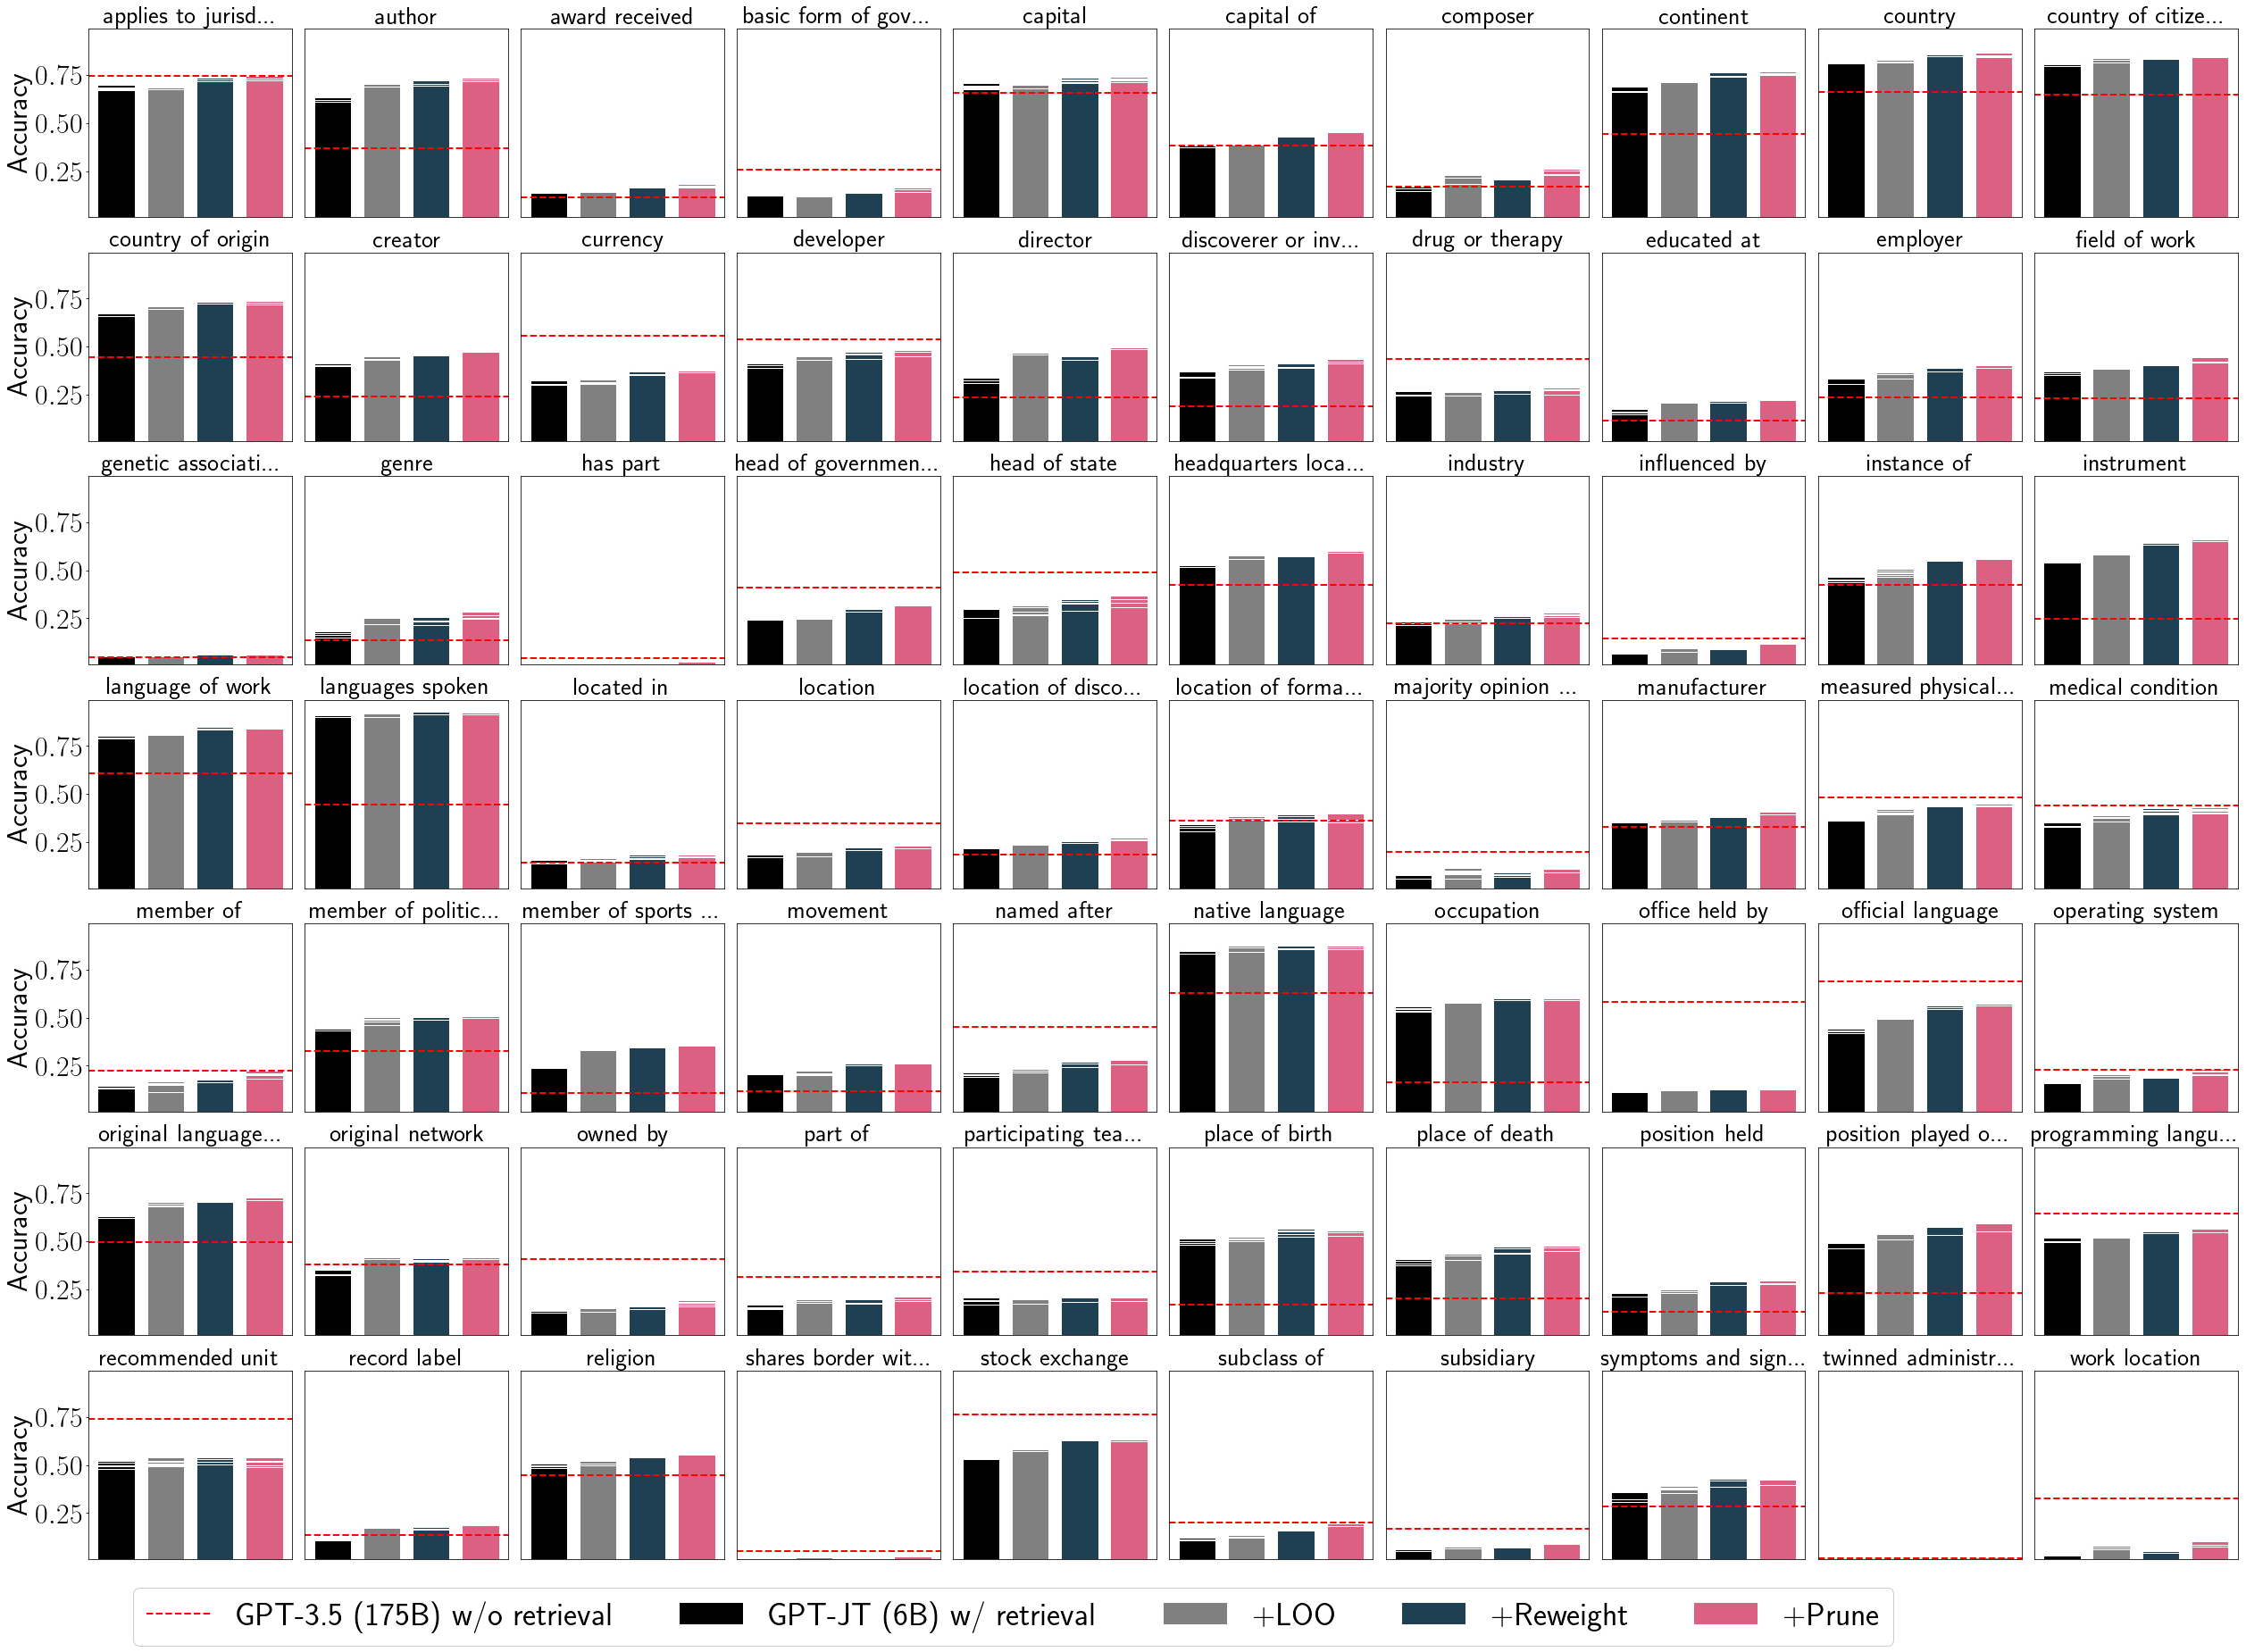

In [29]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['pdf.fonttype'] = 42
plt.rc('text', usetex=True)
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

H = 7
W = 10
width = 3.5


# patterns = ['//', '\\\\', '', '//', "\\", '+', '\\\\', 'x', '++']
#colors = ["palevioletred", "paleturquoise", "orange","coral"]
colors = ["black", "grey", "#1e4052", "#dc6082"]

total_bplot = []

fig, axs = plt.subplots(H, W, figsize=(W * width, H * width))
for i in range(H):
    for j in range(W):
        index = i*W+j

        x = ["vanilla", "loo", "reweight", "prune"]
        y = [acc_vanilla[index], acc_loo[index], acc_reweight[index], acc_prune[index]]

        b1 = axs[i, j].bar( 0, acc_vanilla[index], width=0.75, color = colors[0], edgecolor='white', align='center')
        b2 = axs[i, j].bar( 1, acc_loo[index], width=0.75, color = colors[1], edgecolor='white', align='center')
        b3 = axs[i, j].bar( 2, acc_reweight[index], width=0.75, color = colors[2], edgecolor='white', align='center')
        b4 = axs[i, j].bar( 3, acc_prune[index], width=0.75, color = colors[3], edgecolor='white', align='center')
        
                
        
        #bplot = axs[i, j].boxplot(y, showfliers=False,medianprops=dict(color="black"), patch_artist=True)
        #total_bplot = bplot
        #for patch, color in zip(bplot['boxes'], colors):
        #    patch.set_facecolor(color)
        axs[i, j].set_xticks([])
        # axs[i, j].set(xticklabels= x)
        
        axs[i, j].set_ylim((0.01, 0.99))
        
        if j > 0:
            axs[i, j].get_yaxis().set_visible(False)
        else:
            axs[i, j].set_ylabel('Accuracy', fontsize=32)
            axs[i, j].tick_params(axis='both', which='major', labelsize=32)
            axs[i, j].tick_params(axis='both', which='minor', labelsize=32)           
        
        relation_name = relation[index].replace("_", " ")
        if len(relation_name) > 17:
            relation_name = relation_name[0:17] + "..."
        
        axs[i, j].set_title(relation_name, fontsize=28, fontweight='bold')
        gpt = axs[i, j].axhline(y=acc_davincii[index], color='red', linestyle='--', linewidth=2)
        #axs[i, j].spines['top'].set_visible(False)
        #axs[i, j].spines['right'].set_visible(False)
        #axs[i, j].yaxis.set_tick_params(labelsize=17)
        # axs[i, j].set_yticklabels(axs[i, j].get_yticks(), weight='bold')


#lines, labels = axs[0, 0].get_legend_handles_labels()
#lines.extend(total_bplot['boxes'])
labels = ["GPT-3.5 (175B) w/o retrieval", "GPT-JT (6B) w/ retrieval", "+LOO", "+Reweight", "+Prune"]
#print(lines, labels)
fig.legend([gpt, b1, b2, b3, b4], labels, bbox_to_anchor=(0.85, 0.0),ncol=5, framealpha=1, fontsize=36)


plt.tight_layout()
plt.savefig("results_qa_polished.pdf", format="pdf", bbox_inches="tight")
plt.show()